## Introduction

On the first Sunday in February each year, millions of Americans gather around their televisions to watch the big game- the Super Bowl. This game seems like an interesting item for analysis, because there are so many facets to it: 

1) The actual game. One could do an analysis of the teams that are in the game, the final scores, the locations, etc.  

2) The halftime show. Every year they make a big deal of who will be performing. One could analyze whether or not these musical guests have an impact on viewership. 

3) The commercials. Some people watch the game for the commercials. Do these commercials have any impact on the game? Are there perhaps any spurious correlations between commercials and the outcome of the game? 
4) The gambling aspect. Almost everyone gets a “square” for the game. Are there any squares that are more common than others? 

I have decided to focus my attention on a couple of key items: evaluating the values of the Super Bowl squares, the overall combined score of the game, the winning scores by themselves, the losing scores by themselves, and the advertising costs.

## Loading the data

We first must start by loading in our data. My data files can be found at the following [link](https://www.kaggle.com/achyutbabu/tv-halftime-shows-and-the-big-game). I will use pandas.read_csv to load our data.

In [3]:
import pandas
import thinkstats2
import thinkplot
import numpy
file_name1 = "super_bowls.csv"
file_name2 = "tv.csv"
superbowl = pandas.read_csv(file_name1)
tv = pandas.read_csv(file_name2)

Now that we have our two data frames, we need to do some combining. I want the TV household ratings, TV ad cost, and the TV network loaded into the superbowl data frame. 

*Please note that in the TV data frame, there are two records for Super Bowl 1. I will be excluding the first record and just using the CBS broadcast in my analysis.* 

In [4]:
tv = tv[0:51]
superbowl["rating_household"] = tv["rating_household"]
superbowl["ad_cost"] = tv["ad_cost"]
superbowl["network"] = tv["network"]

We now have all of the columns that we need. There is however one more problem: this data frame contains Super Bowls 1-52, and there have been 54. So we will need to append information about the two most recent Super Bowls. As a Bills fan, it pains me to add another New England victory to the mix but I will do so for the betterment of this analysis...

In [5]:
sb_53_54 = {'date': ["2019-02-03","2020-02-02"], 'super_bowl': [53,54],"venue":["Mercedes-Benz Stadium", "Hard Rock Stadium"],
            "city":["Atlanta","Miami Gardens"],"state":["Georgia","Florida"],
            "attendance":[70081,62417],"team_winner":["New England Patriots","Kansas City Chiefs"],
            "winning_pts":[13,31],"qb_winner_1":["Tom Brady","Patrick Mahomes"]
            ,"qb_winner_2":["",""],"coach_winner":["Bill Belichick","Andy Reid"],
            "team_loser":["Los Angeles Rams","San Francisco 49ers"],"losing_pts":[3,20],
            "qb_loser_1":["Jared Goff","Jimmy Garoppolo"],"qb_loser_2":["",""],
            "coach_loser":["Sean McVay","Kyle Shanahan"],"combined_pts":[16,51],
            "difference_pts":[10,11], "rating_household":[41.1,41.6],
            "ad_cost":[5250000,5600000],"network":["CBS","Fox"]}
sb_53_54_df = pandas.DataFrame(data = sb_53_54)
superbowl = superbowl.append(sb_53_54_df)

To maintain consistency with our previous data frame, we will sort by Super Bowl number so the most recent Super Bowls jump to the top.

In [6]:
superbowl = superbowl.sort_values(by="super_bowl",ascending=False)

All of the columns and rows are in place, so we can now proceed with our analysis!

## Winning Points, Losing Points, and Combined Points

Three of our variables are winning points, losing points, and combined points. 
- Winning points is the number of points scored by the winning team
- Losing points is the number of points scored by the losing team
- Combined points is the total number of point scored by both teams

Let us begin by looking at winning points

### Winning Points

Winning points are stored in the variable named winning_pts

In [7]:
mean_winning = superbowl.winning_pts.mean()
var_winning = superbowl.winning_pts.var()
std_winning = superbowl.winning_pts.std()
mode_winning = superbowl.winning_pts.mode()
print("Mean of winning points:", mean_winning,"\n",
      "Variance of winning points:", var_winning,"\n",
      "Standard Deviation of winning points:", std_winning,"\n",
      "Mode of winning points:", mode_winning)

Mean of winning points: 30.11111111111111 
 Variance of winning points: 95.38364779874215 
 Standard Deviation of winning points: 9.766455232004196 
 Mode of winning points: 0    27
1    31
dtype: int64


As we can see, the average winning score is roughly 30 points. Deviations of roughly 9 to 10 points from the mean are common. The most common winning scores are 27 and 31. 

Let us now generate a histogram of the winning point totals:

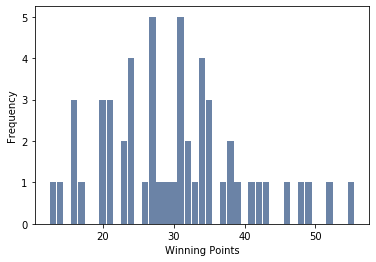

In [8]:
hist_winning = thinkstats2.Hist(superbowl.winning_pts)
thinkplot.Hist(hist_winning)
thinkplot.Config(xlabel = 'Winning Points',
                 ylabel='Frequency')

This histogram does not tell us much. Most of the winning scores occur between 25 and 40, which is not surprising as those are good scores to have in a football game. There are some low numbers that have won games, these would be considered outliers. We will keep them in our analysis, but we will dig a little deeper into the low values later in this project. 

### Losing Points

Let us now calculate the summary statistics for the losing scores. This variable is losing_pts in our dataset.

In [9]:
mean_losing = superbowl.losing_pts.mean()
var_losing = superbowl.losing_pts.var()
std_losing = superbowl.losing_pts.std()
mode_losing = superbowl.losing_pts.mode()
print("Mean of losing points:", mean_losing,"\n",
      "Variance of losing points:", var_losing,"\n",
      "Standard Deviation of losing points:", std_losing,"\n",
      "Mode of losing points:", mode_losing)

Mean of losing points: 16.203703703703702 
 Variance of losing points: 54.95772187281624 
 Standard Deviation of losing points: 7.413347548362767 
 Mode of losing points: 0    10
1    17
dtype: int64


The average losing score is roughly 16 points. The spread of these values is less than that of winning points, as you can see from the lower value of variance. You would expect deviations of 7 to 8 points from the mean to be common. The most common losing points values are 10 and 17.

Let us now look at a histogram of these values:

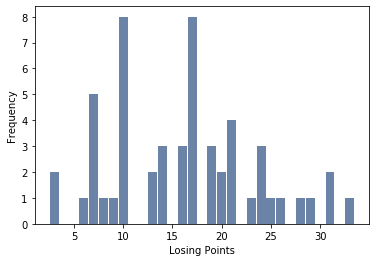

In [10]:
hist_losing = thinkstats2.Hist(superbowl.losing_pts)
thinkplot.Hist(hist_losing)
thinkplot.Config(xlabel = 'Losing Points',
                 ylabel='Frequency')

Once again, this is not a very surprising histogram. The values for losing points tend to be lower (hence the team losing the game). There once again are some outliers, aka losing teams who scored a lot of points. We will look into these later in our analysis. 

### Combined Points
Finally in this section we will look at total points scored in these games. This value is found in the variable named combined_pts.

In [11]:
mean_combined = superbowl.combined_pts.mean()
var_combined = superbowl.combined_pts.var()
std_combined = superbowl.combined_pts.std()
mode_combined = superbowl.combined_pts.mode()
print("Mean of combined points:", mean_combined,"\n",
      "Variance of combined points:", var_combined,"\n",
      "Standard Deviation of combined points:", std_combined,"\n",
      "Mode of combined points:", mode_combined)

Mean of combined points: 46.31481481481482 
 Variance of combined points: 194.29524807826698 
 Standard Deviation of combined points: 13.938983036013315 
 Mode of combined points: 0    31
1    37
2    47
3    56
dtype: int64


The average combined score is roughly 46 points. There is a very large spread for these values, as you can see from the increased variance. One would expect a deviation of 13 to 14 points from the mean to be common. The most common combined scores are 31, 37, 47, and 56.

Next, let's look at a histogram of these values:

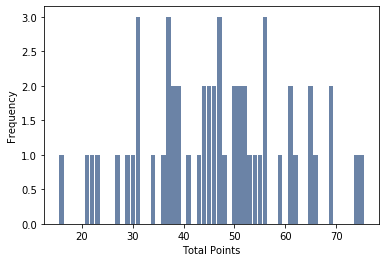

In [12]:
hist_combined = thinkstats2.Hist(superbowl.combined_pts)
thinkplot.Hist(hist_combined)
thinkplot.Config(xlabel = 'Total Points',
                 ylabel='Frequency')

There is not too much to gain from this histogram either. I think the best bet for total points is to look at a CDF, which we will do later in this report. We can also examine the outliers using the following:

In [41]:
combined_pts = superbowl.combined_pts
max_combined = max(combined_pts)
min_combined = min(combined_pts)
print("Maximum Combined Score:",max_combined,"\n","Minimum Combined Score",min_combined)

Maximum Combined Score: 75 
 Minimum Combined Score 16


In [42]:
superbowl[superbowl.combined_pts == 16]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
0,2019-02-03,53,Mercedes-Benz Stadium,Atlanta,Georgia,70081,New England Patriots,13,Tom Brady,,...,Jared Goff,,Sean McVay,16,10,41.1,5250000.0,CBS,3,3


In [43]:
superbowl[superbowl.combined_pts == 75]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,...,Stan Humphreys,NaN,Bobby Ross,75,23,41.3,1150000.0,ABC,9,6


## Histogram of Super Bowl Square Values
I am sure everyone here has participated in a Super Bowl Squares Pool. Let us look at an example in case anyone is unfamiliar:

In Super Bowl 54, the final score was Kansas City (AFC) 31, San Francisco (NFC) 20. In a 10x10 grid, each column and row is represented by a combination of 2 numbers. On one axis we have AFC (for this example lets say the top row), and on the other axis we have the NFC (for this example, the first column). We take the final digit of the scores for the teams (in this case, 1-0), and that is the winning square



|   	| 0 	| 1 	| 2 	| 3 	| 4 	| 5 	| 6 	| 7 	| 8 	| 9 	|
|---	|---	|---	|---	|---	|---	|---	|---	|---	|---	|---	|
| 0 	|   	|WINNER	|   	|   	|   	|   	|   	|   	|   	|   	|  
| 1 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	| 
| 2 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	| 
| 3 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	| 
| 4 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|
| 5 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|
| 6 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|
| 7 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|
| 8 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|
| 9 	|   	|   	|   	|   	|   	|   	|   	|   	|   	|   	|

I would like to create a histogram of the individual values that occur in Super Bowl squares. We will need to create new variables in order to accomplish this:

In [13]:
superbowl["winning_pts_2"] = superbowl.winning_pts % 10
superbowl["losing_pts_2"] = superbowl.losing_pts % 10

By using the mod 10 we are able to only include the ones digit of our score. 

The summary statistics are not very important for our analysis here, since we only have 10 specific options. I will look at mode quickly to determine which values are the most common. After that, we will look at a histogram of just the winning square values:

In [14]:
mode_winning_square = superbowl.winning_pts_2.mode()
mode_losing_square = superbowl.losing_pts_2.mode()
print("Most common winning square:",mode_winning_square,"\n",
      "Most common losing square:",mode_losing_square)

Most common winning square: 0    1
1    4
dtype: int64 
 Most common losing square: 0    7
dtype: int64


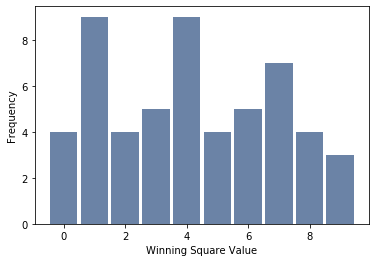

In [15]:
hist_winningsquares = thinkstats2.Hist(superbowl.winning_pts_2)
thinkplot.Hist(hist_winningsquares)
thinkplot.Config(xlabel = 'Winning Square Value',
                 ylabel='Frequency')

Next we will look at a histogram of just the losing square values:

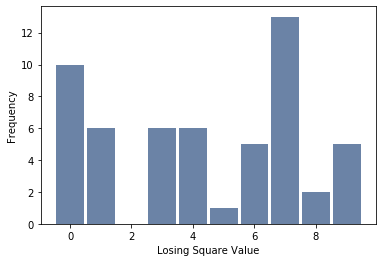

In [35]:
hist_losingsquares = thinkstats2.Hist(superbowl.losing_pts_2)
thinkplot.Hist(hist_losingsquares)
thinkplot.Config(xlabel = 'Losing Square Value',
                 ylabel='Frequency')

However, I think the best bet would actually be to see a combined histogram, which will give us a good idea of how many total times these numbers were found in a Super Bowl Square.

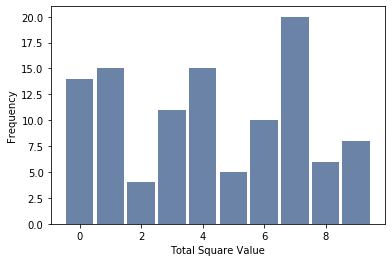

In [17]:
hist_winning_dict = hist_winningsquares.GetDict()
hist_losing_dict = hist_losingsquares.GetDict()

def mergeDict(dict1, dict2):
   dict3 = {**dict1, **dict2}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
               dict3[key] = dict1[key] + dict2[key]
 
   return dict3

hist_total_dict = mergeDict(hist_winning_dict, hist_losing_dict)

hist_totalsquares = thinkstats2.Hist(hist_total_dict)

thinkplot.Hist(hist_totalsquares)
thinkplot.Config(xlabel = 'Total Square Value',ylabel='Frequency')

In explanation of my code: I first created the Hist objects for winning scores only and losing scores only. We then created a function called mergeDict, where we combine the values of these so we have an overall frequency. We then plot these values in a histogram.

For those familiar with American Football scores, these results are not very surprising. 0, 1, 4, and 7 are the most common, while 2, 5, and 8 are the least.

We can also use Downey's code to create a PMF for this data:

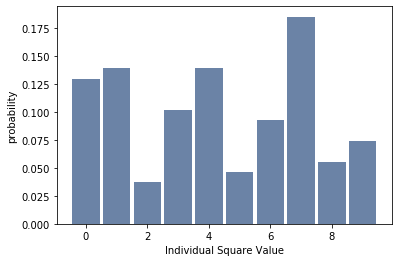

In [7]:
pmf = thinkstats2.Pmf(hist3)
thinkplot.Hist(pmf)
thinkplot.Config(xlabel = "Individual Square Value",ylabel = "probability")

This graph converts frequency to a probability. From both graphs, you can see that you should be crossing your fingers to get a 7, and cursing the pool runner if you get a 5!

## Advertising Cost

Next we will look at a histogram of advertising cost. Let us start again with the summary statistics:

In [18]:
mean_ad = superbowl.ad_cost.mean()
var_ad = superbowl.ad_cost.var()
std_ad = superbowl.ad_cost.std()
mode_ad = superbowl.ad_cost.mode()
print("Mean of ad cost:", mean_ad,"\n",
      "Variance of ad cost:", var_ad,"\n",
      "Standard Deviation of ad cost:", std_ad,"\n",
      "Mode of ad cost:", mode_ad)

Mean of ad cost: 1659919.3962264152 
 Variance of ad cost: 2732508040774.1294 
 Standard Deviation of ad cost: 1653029.957615448 
 Mode of ad cost: 0    2200000.0
1    5000000.0
dtype: float64


Since the ad costs have changed so dramatically over time, it is hard to really summarize this information. The average Super Bowl ad cost was 1.65 million. Because the values are so wide spread, the variance and standard deviations are very high. The most common ad costs have been 2.2 million and 5 million.

I don't think a histogram of this data would be helpful in our analysis. Later we will view a scatter plot of ad cost vs super bowl, and we will dig a little bit deeper into that.

### TV Household Rating
Next we will examine the household ratings for the games. These values are found in the field rating_household.

In [24]:
mean_ratings = superbowl.rating_household.mean()
var_ratings = superbowl.rating_household.var()
std_ratings = superbowl.rating_household.std()
mode_ratings = superbowl.rating_household.mode()
print("Mean of TV rating:", mean_ratings,"\n",
      "Variance of TV rating:", var_ratings,"\n",
      "Standard Deviation of TV rating:", std_ratings,"\n",
      "Mode of TV rating:", mode_ratings)

Mean of TV rating: 43.483018867924535 
 Variance of TV rating: 8.911821480406388 
 Standard Deviation of TV rating: 2.9852674051760233 
 Mode of TV rating: 0    41.6
dtype: float64


The average rating for a Super Bowl is roughly 43.5. There is a relatively low spread for these values. Deviations of roughly 3 points from the mean are common. The most common TV rating was 41.6.

Let us now look at a histogram of this data:

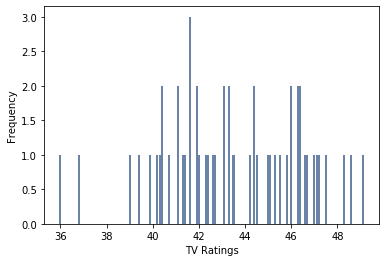

In [25]:
hist_rating = thinkstats2.Hist(superbowl.rating_household)

thinkplot.Hist(hist_rating)
thinkplot.Config(xlabel = 'TV Ratings',ylabel='Frequency')

We now want to look at the outliers:

In [44]:
superbowl[superbowl.rating_household < 38]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,...,Earl Morrall,Johnny Unitas,Don Shula,23,9,36.0,55000.0,NBC,6,7
50,1968-01-14,2,Orange Bowl,Miami,Florida,75546,Green Bay Packers,33,Bart Starr,NaN,...,Daryle Lamonica,NaN,John Rauch,47,19,36.8,54500.0,CBS,3,4


In [45]:
superbowl[superbowl.rating_household > 48]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,...,Tony Eason,Steve Grogan,Raymond Berry,56,36,48.3,550000.0,NBC,6,0
35,1983-01-30,17,Rose Bowl,Pasadena,California,103667,Washington Redskins,27,Joe Theismann,NaN,...,David Woodley,NaN,Don Shula,44,10,48.6,400000.0,NBC,7,7
36,1982-01-24,16,Pontiac Silverdome,Pontiac,Michigan,81270,San Francisco 49ers,26,Joe Montana,NaN,...,Ken Anderson,NaN,Forrest Gregg,47,5,49.1,324300.0,CBS,6,1


## PMFs and CDFS of Winning Scores and Losing Scores

We will now do some analysis of the winning and losing scores. We will first look at a PMF of both values

In [36]:
winning_pts = superbowl.winning_pts
losing_pts = superbowl.losing_pts
winning_pmf = thinkstats2.Pmf(winning_pts, label = "Winning")
losing_pmf = thinkstats2.Pmf(losing_pts, label = "Losing")

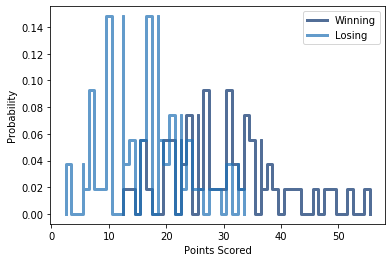

<Figure size 576x432 with 0 Axes>

In [37]:
thinkplot.Pmfs([winning_pmf, losing_pmf])
thinkplot.Show(xlabel = 'Points Scored',
               ylabel = 'Probability')

Not very surprisingly, these graphs are very different. The low values have very high probabilities for teams that lose, and the high numbers have high probabilities for teams that win. 

Let us look at CDFs to get another view of this:

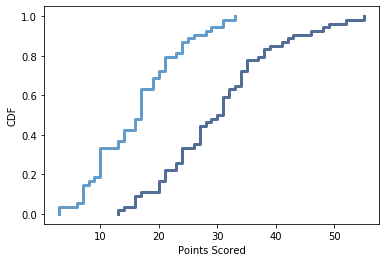

In [44]:
winning_cdf = thinkstats2.Cdf(winning_pts,label="Winning Points")
losing_cdf = thinkstats2.Cdf(losing_pts,label="Losing Points")
thinkplot.Cdfs([winning_cdf,losing_cdf])
thinkplot.Config(xlabel = "Points Scored", ylabel = "CDF")

These plots are not really very surprising. The losing CDF has lower values, as a lower score results in a lower chance of winning. Almost 2/3 of the losing teams in Super Bowls scored fewer than 17 points. Meanwhile for winning teams, only half of them scored less than 30. What I take from this is that there are not many low scoring games in Super Bowl history. If you win, chances are you scored a lot of points. 

These plots have me thinking though, who scored the most points of all of the losing teams, and who scored the fewest amongst the winning teams. Let us run some code to get the points values.

In [45]:
max_losing = max(losing_pts)
min_winning = min(winning_pts)
print("Maximum Losing Score:",max_losing,"\n","Minimum Winning Score",min_winning)

Maximum Losing Score: 33 
 Minimum Winning Score 13


Now that we have these values, I will use some code to find the game in which they happened. 

In [46]:
superbowl_max_losing = superbowl[superbowl.losing_pts == 33].super_bowl
superbowl_max_losing

0    52
Name: super_bowl, dtype: int64

As we see from this query, we are looking at Super Bowl 52. Let's look to see who played and what the outcome was.

In [47]:
superbowl[superbowl.super_bowl == 52]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,...,Tom Brady,NaN,Bill Belichick,74,8,43.1,5000000.0,NBC,1,3


Ahh yes, Patriots vs Eagles. One of my favorites. The Eagles were able to defeat the Patriots, despite the Patriots offense scoring 33 points. I will forever be grateful to Nick Foles for his performance in this one!

Let us know look into the lowest scoring winner. 

In [48]:
super_bowl_min_winning = superbowl[superbowl.winning_pts == 13].super_bowl
super_bowl_min_winning

0    53
Name: super_bowl, dtype: int64

We see from the above query that this was Super Bowl 53. Let us once again check to see what the outcome was.

In [49]:
superbowl[superbowl.super_bowl == 53]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts,rating_household,ad_cost,network,winning_pts_2,losing_pts_2
0,2019-02-03,53,Mercedes-Benz Stadium,Atlanta,Georgia,70081,New England Patriots,13,Tom Brady,,...,Jared Goff,,Sean McVay,16,10,41.1,5250000.0,CBS,3,3


We once again see our beloved Patriots make an appearance. This time their luck shifted, as they were able to defeat the Rams while only scoring 13 points. 

## CDF of combined points

The last CDF I want to generate is that of combined points. Sports betting is a growing industry, and one of the more common things to bet on is the over/under for the game. Will the final combined score be greater than or equal to x. We can use a CDF to determine the probability of a score going under. 

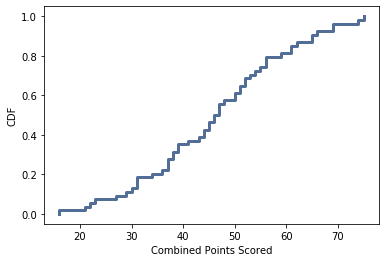

In [16]:
combined_pts = superbowl.combined_pts
combined_cdf = thinkstats2.Cdf(combined_pts)
thinkplot.Cdf(combined_cdf)
thinkplot.Config(xlabel = "Combined Points Scored", ylabel = "CDF")

If we look at this CDF, 50% of the Super Bowls have had less than 46 combined points scored. After a quick Google search, due to the high-powered Kansas City offense, the over/under for Super Bowl 54 was actually set at 54 points. Let us look into the CDF value for this over/under:

In [17]:
combined_cdf[54]

0.7222222222222222

This specific value has hit the under in 72% of Super Bowls in history. If you were to base your bets off past trends, you may have considered betting the under here. The final score of the game ended up being 31-20, so the under bet did hit.

## Hypothesis Test
I have a hypothesis that the scoring has increased over the history of the Super Bowl. In order to test this, we will test a difference in means of the first 27 Super Bowls versus the last 27 Super Bowls. Let's prepare our data:

In [33]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

class DiffMeansPermute(HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [34]:
first_27 = superbowl[superbowl.super_bowl <= 27].combined_pts
last_27 = superbowl[superbowl.super_bowl > 27].combined_pts
data = first_27, last_27
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("p-value =",pvalue)

p-value = 0.176


The resulting p-value is 0.176, which means that we expect to see a difference as big as the observed effect about 17.6% of the time. This effect is not statistically significant. There has not been a significant difference in combined score in the most recent Super Bowls vs the earlier ones. 

Let us also look at a PMF comparison for these values.

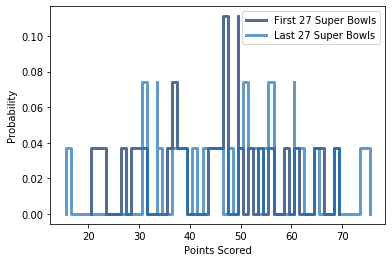

<Figure size 576x432 with 0 Axes>

In [39]:
first27_pmf = thinkstats2.Pmf(first_27, label = "First 27 Super Bowls")
last27_pmf = thinkstats2.Pmf(last_27, label = "Last 27 Super Bowls")
thinkplot.Pmfs([first27_pmf, last27_pmf])
thinkplot.Show(xlabel = 'Points Scored',
               ylabel = 'Probability')

## Distribution of Advertising Costs

I now want to look at the evolution of advertising price over the course of the Super Bowl. We will first look at a simple scatter plot of this data:

*Please note, I will be excluding Super Bowl 1 because there is no advertising cost information for this game*

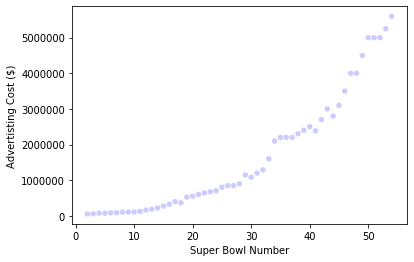

<Figure size 576x432 with 0 Axes>

In [47]:
df = superbowl[superbowl.super_bowl > 1]
sbdf = df.super_bowl
acdf = df.ad_cost

thinkplot.Scatter(sbdf, acdf)
thinkplot.Show(xlabel = 'Super Bowl Number',
               ylabel = 'Advertisting Cost ($)')

This definitely appears to be an exponential distribution. One way to examine whether or not this distribution is exponential is to examine both the CDF and the complementary CDF (CCDF).

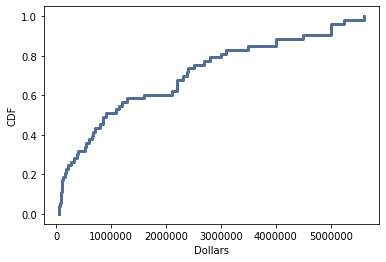

<Figure size 576x432 with 0 Axes>

In [48]:
cdf_ad = thinkstats2.Cdf(acdf)
thinkplot.Cdf(cdf_ad)
thinkplot.Show(xlabel = 'Dollars', ylabel = 'CDF')

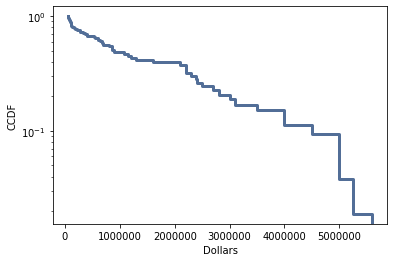

<Figure size 576x432 with 0 Axes>

In [49]:
thinkplot.Cdf(cdf_ad, complement = True)
thinkplot.Show(xlabel = 'Dollars', ylabel = 'CCDF',yscale='log')

If we look at our textbook, the CDF definitely resembles that of an exponential distribution. The CCDF for an exponential distribution is supposed to be a straight line. While the CCDF is not perfectly straight, it would definitely be reasonable to model this data using an exponential distribution. 

Another way to examine this would be to look at a scatter plot of log values. 

C:\Users\goodw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


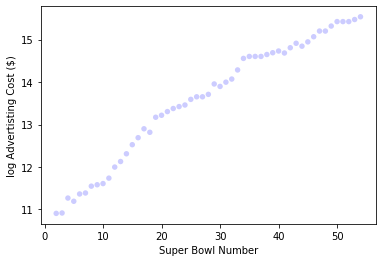

<Figure size 576x432 with 0 Axes>

In [20]:
import numpy

df["ad_cost_log"] = numpy.log(df.ad_cost)
acldf = df.ad_cost_log
thinkplot.Scatter(sbdf, acldf)
thinkplot.Show(xlabel = 'Super Bowl Number',
               ylabel = 'log Advertisting Cost ($)')

This graph being linear would back up my theory that the relationship between the two variables is exponential. Let us create a best fit with this data:

In [21]:
inter, slope = thinkstats2.LeastSquares(sbdf, acldf)
fit_xs, fit_ys = thinkstats2.FitLine(sbdf, inter, slope)

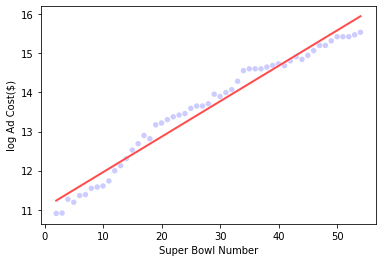

In [22]:
thinkplot.Scatter(sbdf, acldf, color='blue')
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Super Bowl Number",
                 ylabel='log Ad Cost($)',
                 legend=False)

In [23]:
res = thinkstats2.Residuals(sbdf, acldf, inter, slope)
CoD = thinkstats2.CoefDetermination(acldf, res)
CoD

0.9688346192982593

This coefficient of determination is incredibly high (almost 0.97). This measures the goodness of fit of this linear model. This would indicate that there is a very strong linear relationship between these variables.

## TV rating versus Combined Points

I would now like to view a scatter plot of these two variables. I would think that a game with a lot of points would lead to an increase in viewers, but we shall have to see:

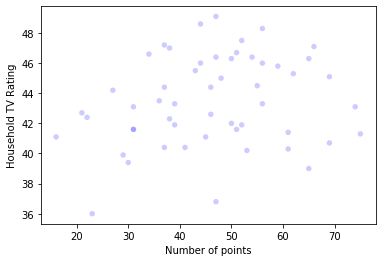

<Figure size 576x432 with 0 Axes>

In [50]:
tv_rating = superbowl.rating_household
combined_pts = superbowl.combined_pts
thinkplot.Scatter(combined_pts, tv_rating)
thinkplot.Show(xlabel = 'Number of points',
               ylabel = 'Household TV Rating')

There does not seem to be a strong linear relationship between these two variables. However, let's perform a linear regression analysis to see exactly:

In [52]:
import statsmodels.formula.api as smf
formula = 'rating_household ~ combined_pts'
model = smf.ols(formula, data=superbowl)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       rating_household   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.108
Date:                Thu, 27 Feb 2020   Prob (F-statistic):              0.153
Time:                        17:09:01   Log-Likelihood:                -131.59
No. Observations:                  53   AIC:                             267.2
Df Residuals:                      51   BIC:                             271.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.5242      1.409     29.476   

As you can see from the very low values of R-squared and the F-statistic, there is not a very good linear relationship between these two variables. One may assume that points don't have a real affect on viewership. While I think that may be true for the Super Bowl, that also has a lot to do with the fact that Super Bowls have high ratings regardless. They don't need any boost. If this was for all football games, I think we would see a stronger relationship here.  